# Bicycle re-balancing with LP Optimization model

<br><br>

<img src="./media/map.png"><br><br>

### Index:

1. [Brief Introduction](#introduction)
2. [Transportation Problem (Supply & Demand)](#transportation)
3. [BlueBikes re-balancing approach](#approach)
4. [Simple Example](#example)
5. [Exploratory Data Analysis](#eda)
6. [Predictive Model](#predict)
7. [Linear Programming (LP) Model](#lp)
8. [Solution](#solution)
9. [Conclusion](#conclusion)

<br><br>

## Brief Introduction <a class="anchor" id="introduction"></a><br>

__Linear programming__ (LP, also called linear optimization) is a method to achieve the best outcome (such as maximum profit or lowest cost) in a mathematical model whose requirements are represented by linear relationships. Linear programming is a special case of mathematical programming, also known as mathematical optimization.

Linear programming is a technique for the optimization of a linear objective function, subject to linear equality and linear inequality constraints. Its feasible region is a convex polytope, which is a set defined as the intersection of finitely many half spaces, each of which is defined by a linear inequality. Its objective function is a real-valued affine (linear) function defined on this polyhedron. A linear programming algorithm finds a point in the polytope where this function has the smallest (or largest) value if such a point exists.

<br><br>

## Transportation Problem (Supply & Demand) <a class="anchor" id="transportation"></a><br>

The transportation problem is concerned with the task of distribution of goods from any __supply__ points to any __demand__ destinations at the lowest total distribution cost possible. Each supply point has a certain supply capacity and each destination has a certain level demand that has to be __fulfilled__. The cost of transportation from one supply point to one destination varies linearly with the quantity supplied. Indeed, transportation problem is approached as a linear programming problem which can be solved by simplex method using linear programming.

The basic approach is to formulate a mathematical model as a linear programming model that represents the problem and then to analyze this model. Any linear programming model includes decision variables that represent the decisions to be made, constraints that represent the restrictions on the feasible values of these decision variables and an objective function that expresses the overall measure of performance for the problem.

<br><br>

## BlueBikes re-balancing approach <a class="anchor" id="approach"></a><br>

<img src="./media/bikes.png"><br><br>

__Bluebikes__ is a fast, fun, and affordable way to get around Boston by bike. It is commonly used for public transportation and recreation. The Bluebikes system is jointly owned and managed by five municipalities in the region: Boston, Brookline, Cambridge, Everett, and Somerville. It consists of 3,000+ bikes at more than 300 stations. Since launching in 2011, residents and visitors from the city of Boston, MA have taken over 11 million trips!


Bike sharing systems offer a mobility service whereby public bicycles, located at different stations across an urban area, are available for shared use. These systems contribute towards obtaining a more sustainable mobility and decreasing traffic and pollution caused by car transportation.  

In a bike sharing system, users can take a bicycle from a station, use it to perform a journey and then leave it at a station, not necessarily the same one of departure. This behavior typically leads to a situation in which some stations become full and others are empty. Hence, a balanced system requires the redistribution of bicycles among stations.

This Jupyter Notebook will address the bike re-balancing problem in two steps. The initial step will be to use historical data to build a reliable predictive model to estimate the number of bike arrivals and departures at each station. The second step will be to build a linear programing (LP) optimization model to minimize the distance needed to re-balance all bikes across stations, satisfying the supply and demand calculated from the predictive model. For this initial approach, the intention is to develop the transportation optimization model, hence we are not going to deeply focus on the predictive model.

<br><br><img src="./media/transportation.png">

<br><br>
The transportation problem is a network-flow model without intermediate locations. To formulate the bike rebalancing problem, let us define the following terms:<br><br>

$a_{i}$ = Number of bikes available at supply node $i$; where $(i = 1, 2, . . . ,m)$


$b_{j}$ = Number of bikes required at demand node $j$; where $(j = 1, 2, . . . ,n)$


$c_{ij}$ = Transportation distance unit from supply node $i$ to demand node $j$; where $(i = 1, 2, . . . ,m; j = 1, 2, . . . , n)$

<br><br>
Note: for the moment, we assume that the total bikes available (supply) is equal to the total bikes required (demand); that is:

<br><br>
$$\sum_{i=1}^m a_{i} = \sum_{j=1}^n b_{j}$$

<br><br>
When this supply–demand equation balance is not satisfied, there are two possible scenarios:

1) Supply is greater or equal than demand: we introduce a “dummy” station and assign the difference between supply minus demand to $b_{dummy}$ .

2) Demand is greater than demand, then we consider this as an infeasible solution and provide different input to our model so that it meets the first scenario.

<br><br>
The decision variables are defined as:

$x_{ij}$ = Number of bikes to be distributed from source $i$ to destination $j$; where $(i = 1, 2, . . . ,m; j = 1, 2, . . . , n)$


<br><br>
We may then formulate the transportation problem as follows:


Objective function:


$$minimize \>\> z = \sum_{i=1}^m \sum_{j=1}^n c_{ij}x_{ij}$$

Subject to:

$$\sum_{j=1}^n x_{ij} = a_{i} \hspace{10mm}(i = 1, 2, ..., m)$$
<br><br>
$$\sum_{i=1}^m x_{ij} = b_{j} \hspace{10mm}(j = 1, 2, ..., n)$$
<br><br>
$$x_{ij} \geq 0 \hspace{10mm}(i = 1, 2, ..., m \>;\> j = 1, 2, ..., n)$$

<br><br><br>
The objective function expression represents the minimization of the total distance effort, assuming a linear distance structure for rebalancing bikes. 

First constraint equation states that the amount of bikes being sent from station $i$ to all possible destiny stations should be at least equal to the total available bikes, $a_{i}$, at that source. We can also call this equation: __supply constraint__.

Second constraint equation states that the amount of bikes being sent to destination $j$ from all possible sources should be equal to the requirements, $b_{j}$, at that destination. We can also call this equation: __demand constraint__.


<br><br>

## Simple Example <a class="anchor" id="example"></a><br>

Let us consider the next simple example. 

The inside matrix represents the distance between each station and the outside columns represents the supply and demand for each one of the stations. We want to formulate an equation that give us the minimum distance possible to rebalance bikes across different stations, in such a way that the available supply fulfils the current demand.

<br><br>
<img src="./media/example.png">
<br><br>

Taking in count the previous equations, the linear-programming formulation that corresponds to this transportation problem is:

Objective function:

$$ minimize z = 6.9X_{12} + 3.4X_{13} + 4.2X_{14} + 5.9X_{15} + 4.3X_{16} + 3.8X_{17} + 2.9X_{18}$$
$$6.9X_{21} + 5.5X_{23} + 8.7X_{24} + 1.8X_{25} + 2.8X_{26} + 3.4X_{27} + 4.2X_{28}$$
$$3.4X_{31} + 5.5X_{32} + 7.2X_{34} + 4.8X_{35} + 4.2X_{36} + 4.1X_{37} + 2.9X_{38}$$
$$4.2X_{41} + 8.7X_{42} + 7.2X_{43} + 7.6X_{45} + 5.8X_{46} + 5.2X_{47} + 5.3X_{48}$$
$$5.9X_{51} + 1.8X_{52} + 4.8X_{53} + 7.6X_{54} + 1.8X_{56} + 2.4X_{57} + 3.1X_{58}$$
$$4.3X_{61} + 2.8X_{62} + 4.2X_{63} + 5.8X_{64} + 1.8X_{65} + 1.6X_{67} + 1.5X_{68}$$
$$3.8X_{71} + 3.4X_{72} + 4.1X_{73} + 5.2X_{74} + 2.4X_{75} + 1.6X_{76} + 1.3X_{78}$$
$$2.9X_{81} + 4.2X_{82} + 2.9X_{83} + 5.3X_{84} + 3.1X_{85} + 1.5X_{86} + 1.3X_{87}$$

Subject to:

    Supply Constraint

$$X_{21} + X_{23} + X_{24} + X_{25} + X_{26} + X_{27} + X_{28} = 4$$

$$X_{41} + X_{42} + X_{43} + X_{45} + X_{46} + X_{47} + X_{48} = 2$$

$$X_{61} + X_{62} + X_{63} + X_{64} + X_{65} + X_{67} + X_{68} = 1$$

$$X_{81} + X_{82} + X_{83} + X_{84} + X_{85} + X_{86} + X_{87} = 2$$

<br><br>

    Demand Constraint

$$X_{21} + X_{31} + X_{41} + X_{51} + X_{61} + X_{71} + X_{81} = 2$$

$$X_{13} + X_{23} + X_{43} + X_{53} + X_{63} + X_{73} + X_{83} = 1$$

$$X_{15} + X_{25} + X_{35} + X_{45} + X_{65} + X_{75} + X_{85} = 2$$

$$X_{17} + X_{27} + X_{37} + X_{47} + X_{57} + X_{67} + X_{87} = 4$$

<br><br>

$$x_{ij} \geq 0 \hspace{10mm}(i = 1, 2, ..., m \>;\> j = 1, 2, ..., n)$$


<br><br>

## Exploratory Data Analysis <a class="anchor" id="eda"></a><br>

This Jupyter Notebook will conduct a brief exploratory data analysis to better understand the data collected from the [BlueBikes website](https://www.bluebikes.com/system-data)

Furthermore, after analyzing the data, a predictive model will be build and utilized as an input for the optimization model.

In [2]:
# Load Python modules

import os
import datetime
import warnings
import requests
import numpy as np
import pandas as pd
import Utils as utils
from math import radians
import docplex.mp.model as cpx
import matplotlib.dates as mdates
from sklearn.externals import joblib
from IPython.core.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import haversine_distances
from sklearn.ensemble import RandomForestRegressor as RFR
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

warnings.filterwarnings("ignore")

In [3]:
# Load the trips data (previously manipulated to get the summary)
df = pd.read_csv(os.path.join('data','bluebikes-tripdata.csv'))

In [4]:
# Get the main URLs from BlueBikes
response = requests.get('https://gbfs.bluebikes.com/gbfs/gbfs.json')
df_feeds = pd.DataFrame(response.json()['data']['en']['feeds'])

# Send Get Request for Station Status
status_uri = df_feeds.loc[df_feeds['name'] == 'station_status']['url'].reset_index(drop=True)[0]
response = requests.get(status_uri)
df_station_status = pd.DataFrame(response.json()['data']['stations'])

# Send Get Request for Station Information
info_uri = df_feeds.loc[df_feeds['name'] == 'station_information']['url'].reset_index(drop=True)[0]
response = requests.get(info_uri)
df_station_info = pd.DataFrame(response.json()['data']['stations'])

# Select only the stations that are active
df_station_status = df_station_status[df_station_status['station_status'] == 'active']

# Select only the important columns and merge both dataframes
df_station_status = df_station_status[['station_id','num_bikes_available','num_docks_available']]
df_station_info = df_station_info[['station_id', 'short_name', 'name', 'lat', 'lon']]

df_stations = df_station_status.merge(df_station_info, on='station_id', how='left') 
df_stations = df_stations[['station_id','short_name','name','lat','lon','num_bikes_available','num_docks_available']]

# Add the Station information to the rental data
df_station_info['station_id'] = df_station_info['station_id'].astype(np.int)
df = df.merge(df_station_info, left_on=['start station id'], right_on=['station_id'], how='inner')
df = df[['station_id','short_name','name','starttime','usertype','birth year', 'year', 'month', 'day', 'hour', 'holiday', 'weekend','bikes_rental']]

In [5]:
pd.set_option('display.max_colwidth', -1)

display(HTML("<br><h3>BlueBike URLs Available for data requests</h3><br>"))
display(df_feeds)
display(HTML("<br><h3>BlueBike Station Info (station_information) *only first 20*</h3><br>"))
display(df_station_info.head(20))

display(HTML("<br><h3>BlueBike Historical rental data *only first 5*</h3><br>"))
display(df.head(5))

,name,url
0,system_information,https://gbfs.bluebikes.com/gbfs/en/system_information.json
1,station_information,https://gbfs.bluebikes.com/gbfs/en/station_information.json
2,station_status,https://gbfs.bluebikes.com/gbfs/en/station_status.json
3,free_bike_status,https://gbfs.bluebikes.com/gbfs/en/free_bike_status.json
4,system_hours,https://gbfs.bluebikes.com/gbfs/en/system_hours.json
5,system_calendar,https://gbfs.bluebikes.com/gbfs/en/system_calendar.json
6,system_regions,https://gbfs.bluebikes.com/gbfs/en/system_regions.json
7,system_alerts,https://gbfs.bluebikes.com/gbfs/en/system_alerts.json


,station_id,short_name,name,lat,lon
0,3,B32006,Colleges of the Fenway - Fenway at Avenue Louis Pasteur,42.340115,-71.100619
1,4,C32000,Tremont St at E Berkeley St,42.345392,-71.069616
2,5,B32012,Northeastern University - North Parking Lot,42.341814,-71.090179
3,6,D32000,Cambridge St at Joy St,42.361257,-71.065287
4,7,A32000,Fan Pier,42.353391,-71.044571
5,8,A32001,Union Square - Brighton Ave at Cambridge St,42.353334,-71.137313
6,9,A32002,Commonwealth Ave at Agganis Way,42.351692,-71.119035
7,10,A32003,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279
8,11,A32004,Longwood Ave at Binney St,42.338629,-71.106500
9,12,B32002,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,-71.087986


,station_id,short_name,name,starttime,usertype,birth year,year,month,day,hour,holiday,weekend,bikes_rental
0,36,D32005,Copley Square - Dartmouth St at Boylston St,2017-01-01 00:00:00,Customer,\N,2017,1,1,0,0,1,1
1,36,D32005,Copley Square - Dartmouth St at Boylston St,2017-01-01 00:00:00,Subscriber,1983,2017,1,1,0,0,1,1
2,36,D32005,Copley Square - Dartmouth St at Boylston St,2017-01-01 10:00:00,Subscriber,1992,2017,1,1,10,0,1,1
3,36,D32005,Copley Square - Dartmouth St at Boylston St,2017-01-01 11:00:00,Subscriber,1983,2017,1,1,11,0,1,1
4,36,D32005,Copley Square - Dartmouth St at Boylston St,2017-01-01 13:00:00,Customer,\N,2017,1,1,13,0,1,1


<br><br>

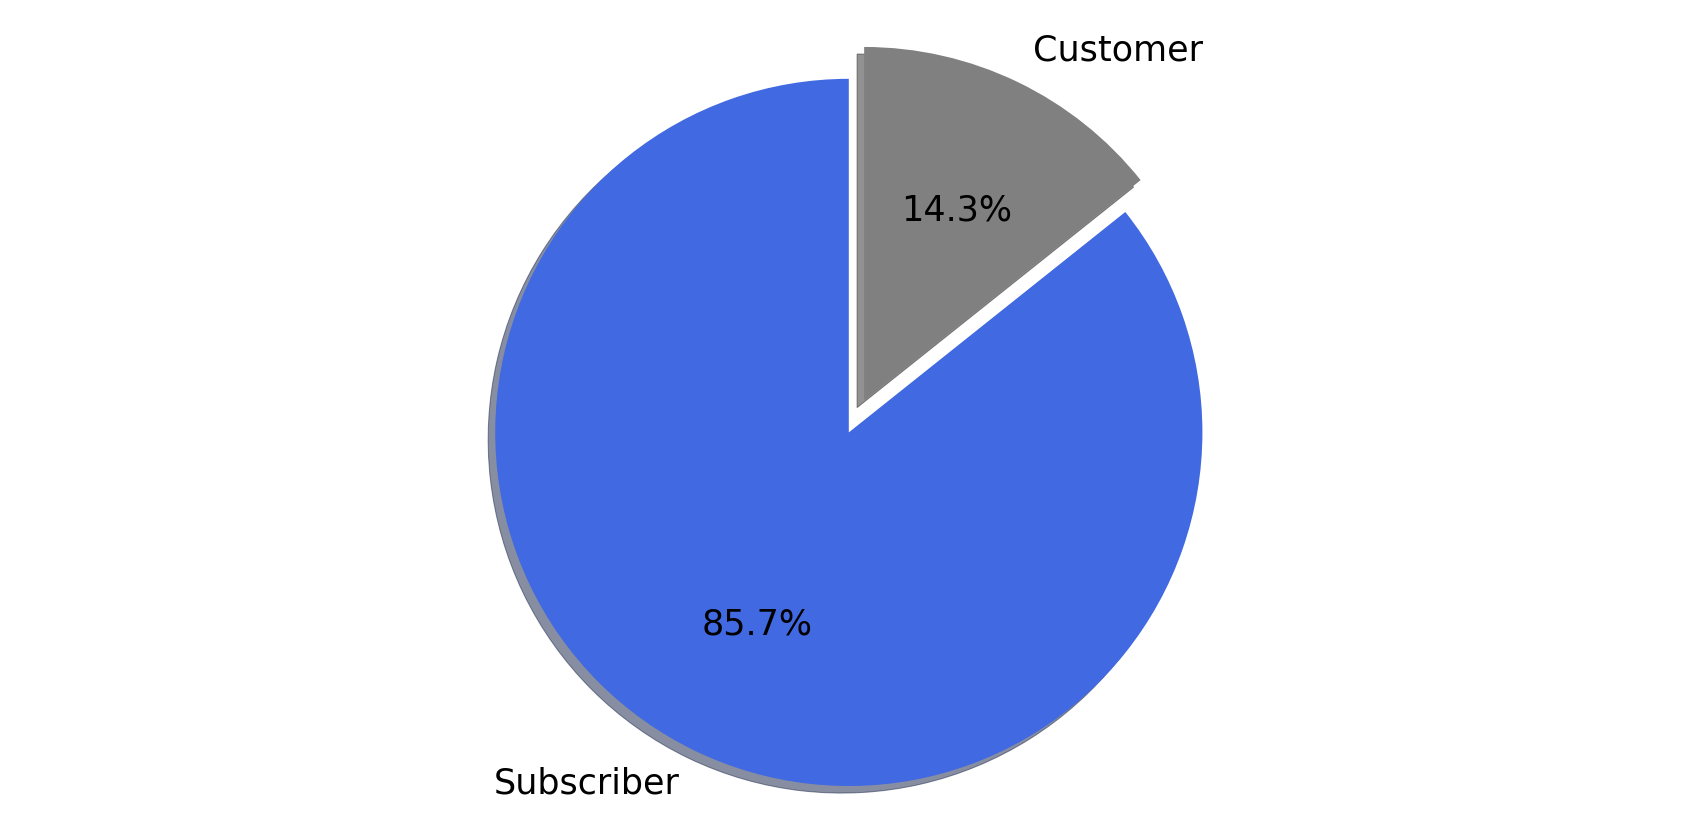

In [6]:
# Pie chart comparing User types (Customer vs Subscribers)
series_usertype = df['usertype'].value_counts()
labels = series_usertype.index.tolist()
values = series_usertype.values.tolist()
display(HTML("<br><h3>User type comparison (Customer vs Subscriber)</h3><br>"))
utils.plot_pie_chart(labels, values, explode=(0.1,0), colors=['royalblue','gray'])

<br><br>

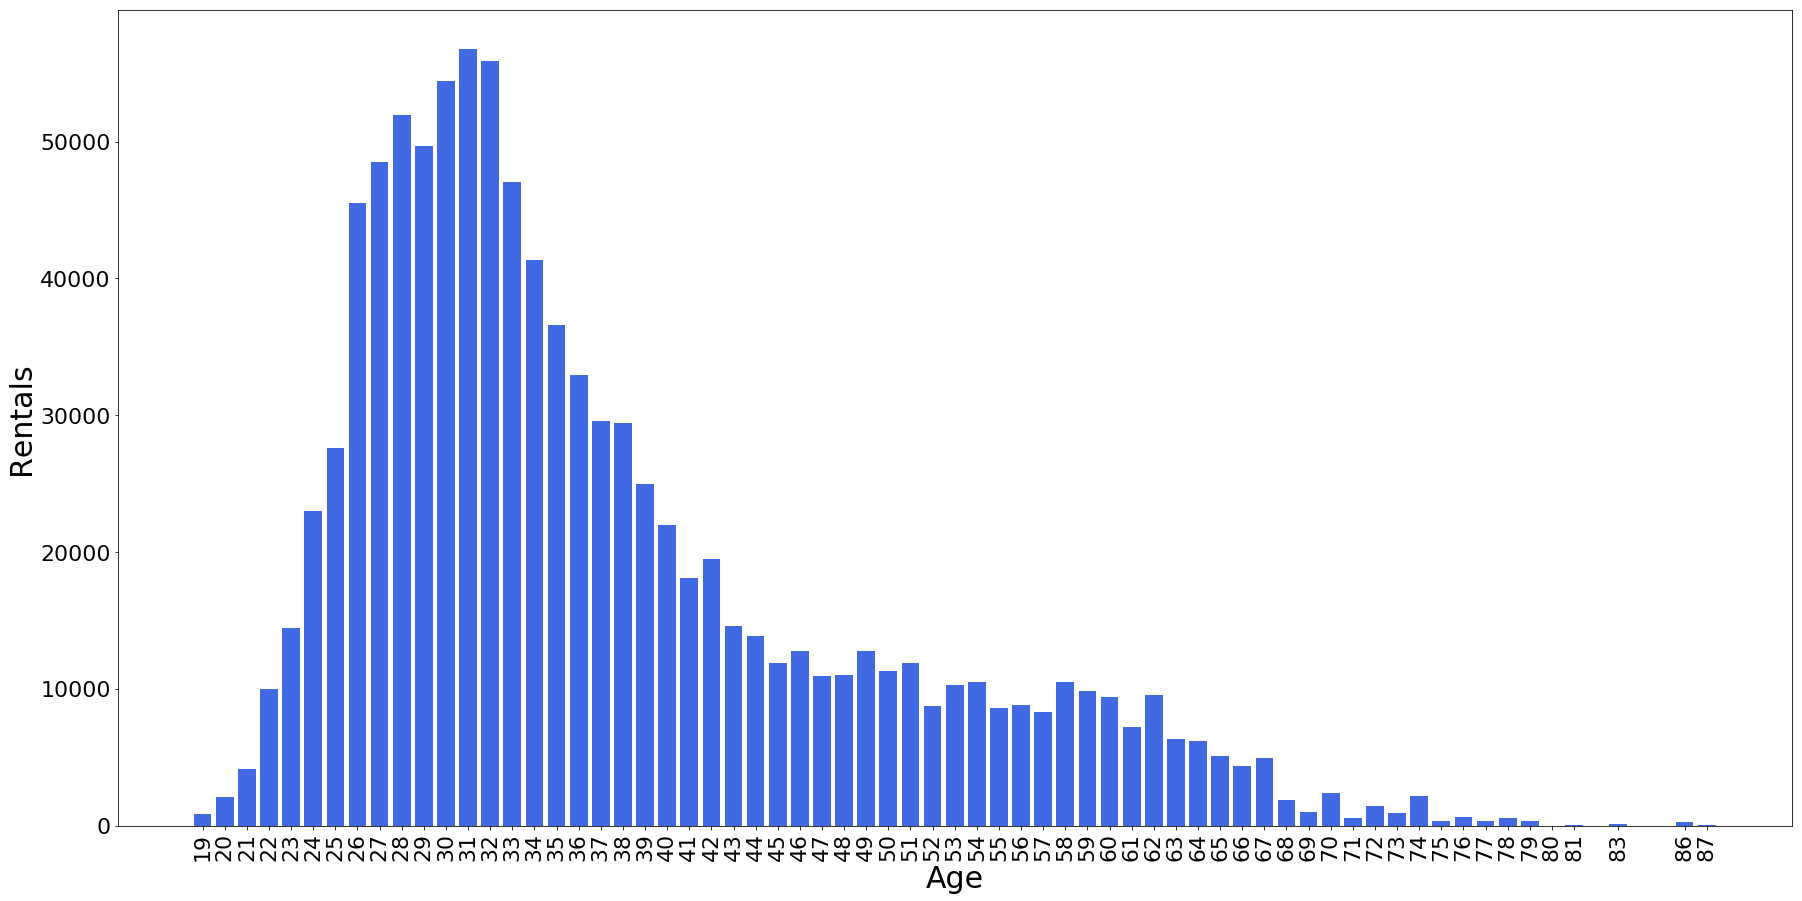

In [7]:
# Bar plot comparing user age distribution
df_birthyear = df[df['birth year'].str.isnumeric() == True]['birth year'].dropna().value_counts().to_frame().reset_index()
df_birthyear = df_birthyear.astype(np.int)
df_birthyear['age'] = 2020 - df_birthyear['index']
df_birthyear = df_birthyear.sort_values(by=['age'])[['age','birth year']].reset_index(drop=True)
df_birthyear.columns = ['age','count']
df_birthyear = df_birthyear[df_birthyear['age']<=90]

display(HTML("<br><h3>User Age Distribution</h3><br>"))
utils.plot_distribution(df_birthyear['age'], df_birthyear['count'], 'Age', 'Rentals')

<br><br>

In [8]:
# Max and min rentals per station and per year
df['starttime'] = pd.to_datetime(df['starttime'])
df_station_rentals_year = df.groupby([df['starttime'].dt.year,'station_id','name'])['bikes_rental'].sum().to_frame().reset_index()

df_station_rentals = df_station_rentals_year.groupby(['station_id','name'])['bikes_rental'].sum().to_frame().reset_index()
df_station_rentals = df_station_rentals.sort_values(by=['bikes_rental'],ascending=False).reset_index(drop=True)
df_station_rentals.columns = ['Station ID', 'Station Name', 'Total Rentals']

df_station_rentals_year = df_station_rentals_year[df_station_rentals_year['starttime'] == 2019]
df_station_rentals_year = df_station_rentals_year.sort_values(by=['bikes_rental'],ascending=False).reset_index(drop=True)
df_station_rentals_year.columns = ['Year', 'Station ID', 'Station Name', 'Total Rentals']
df_station_rentals_year['Avg. Rentals Per Day'] = (df_station_rentals_year['Total Rentals']/365).round(2)

display(HTML("<br><h3>Top 10 Station with more bike rentals (years: 2017, 2018, 2019 and 2020)</h3><br>"))
display(df_station_rentals.head(10))
display(HTML("<br><h3>Last 10 Station with less bike rentals (years: 2017, 2018, 2019 and 2020)</h3><br>"))
display(df_station_rentals.tail(10))

display(HTML("<br><br>"))

display(HTML("<br><h3>Top 10 Station with more bike rentals (previous year: 2019)</h3><br>"))
display(df_station_rentals_year.head(10))
display(HTML("<br><h3>Last 10 Station with less bike rentals (previous year: 2019)</h3><br>"))
display(df_station_rentals_year.tail(10))

,Station ID,Station Name,Total Rentals
0,67,MIT at Mass Ave / Amherst St,166301
1,68,Central Square at Mass Ave / Essex St,122726
2,80,MIT Stata Center at Vassar St / Main St,120481
3,22,South Station - 700 Atlantic Ave,113739
4,189,Kendall T,94963
5,178,MIT Pacific St at Purrington St,89710
6,190,Nashua Street at Red Auerbach Way,89512
7,74,Harvard Square at Mass Ave/ Dunster,87554
8,107,Ames St at Main St,86695
9,179,MIT Vassar St,79058


,Station ID,Station Name,Total Rentals
321,432,Centre St at W. Roxbury Post Office,143
322,433,Centre St at Parkway YMCA,137
323,427,Washington St at Denton Terr,125
324,421,Northbourne Rd at Hyde Park Ave,115
325,422,American Legion Hwy at Canterbury St,111
326,434,Spring St at Powell St,88
327,423,Mt. Hope St at Hyde Park Ave,68
328,435,Central Ave at River St,53
329,431,Washington St at Fuller St,50
330,430,Washington St at Walsh Playground,33


,Year,Station ID,Station Name,Total Rentals,Avg. Rentals Per Day
0,2019,67,MIT at Mass Ave / Amherst St,61056,167.28
1,2019,68,Central Square at Mass Ave / Essex St,50997,139.72
2,2019,80,MIT Stata Center at Vassar St / Main St,47196,129.30
3,2019,22,South Station - 700 Atlantic Ave,44420,121.70
4,2019,107,Ames St at Main St,39128,107.20
5,2019,189,Kendall T,36917,101.14
6,2019,190,Nashua Street at Red Auerbach Way,36655,100.42
7,2019,74,Harvard Square at Mass Ave/ Dunster,35094,96.15
8,2019,178,MIT Pacific St at Purrington St,34991,95.87
9,2019,179,MIT Vassar St,29787,81.61


,Year,Station ID,Station Name,Total Rentals,Avg. Rentals Per Day
320,2019,445,Geiger Gibson Community Health Center,119,0.33
321,2019,421,Northbourne Rd at Hyde Park Ave,115,0.32
322,2019,432,Centre St at W. Roxbury Post Office,97,0.27
323,2019,433,Centre St at Parkway YMCA,93,0.25
324,2019,422,American Legion Hwy at Canterbury St,88,0.24
325,2019,423,Mt. Hope St at Hyde Park Ave,68,0.19
326,2019,435,Central Ave at River St,53,0.15
327,2019,431,Washington St at Fuller St,50,0.14
328,2019,434,Spring St at Powell St,49,0.13
329,2019,430,Washington St at Walsh Playground,33,0.09


<br><br>

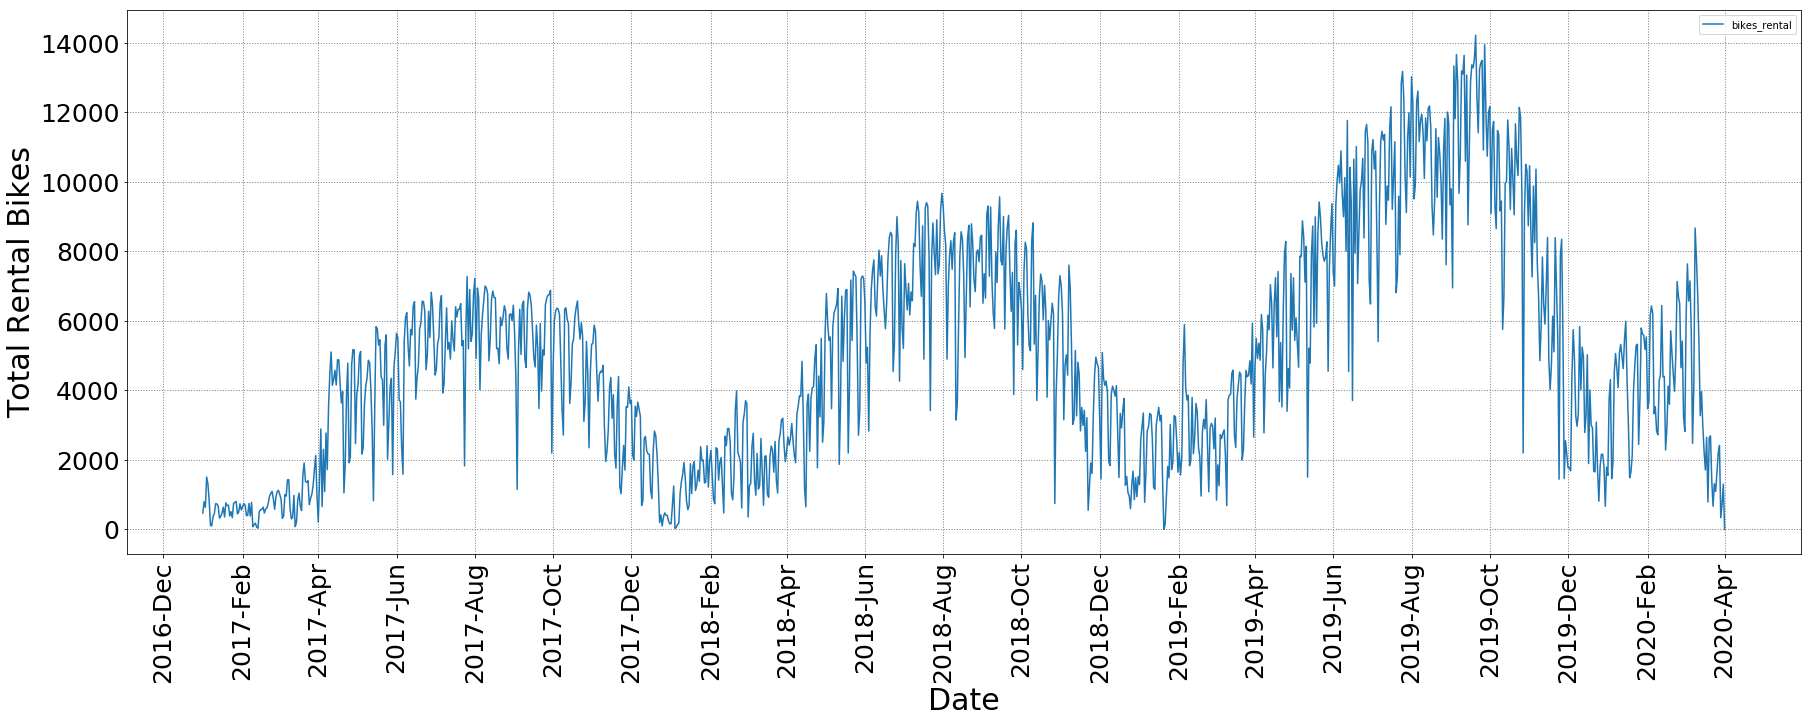

In [9]:
# Get total rentals per day (all stations) and plot a timeseries
df['starttime'] = pd.to_datetime(df['starttime'])
df_daily_rentals = df.groupby([df['starttime'].dt.floor('D')])['bikes_rental'].sum().to_frame().reset_index()

intervals = mdates.MonthLocator(interval=2)
display(HTML("<br><h3>Total bikes rented over time</h3><br>"))
utils.plot_timeseries(df_daily_rentals,'starttime', ['bikes_rental'],'Date', 'Total Rental Bikes', intervals, font_size=25, fig_size=(30,10))

<br><br>

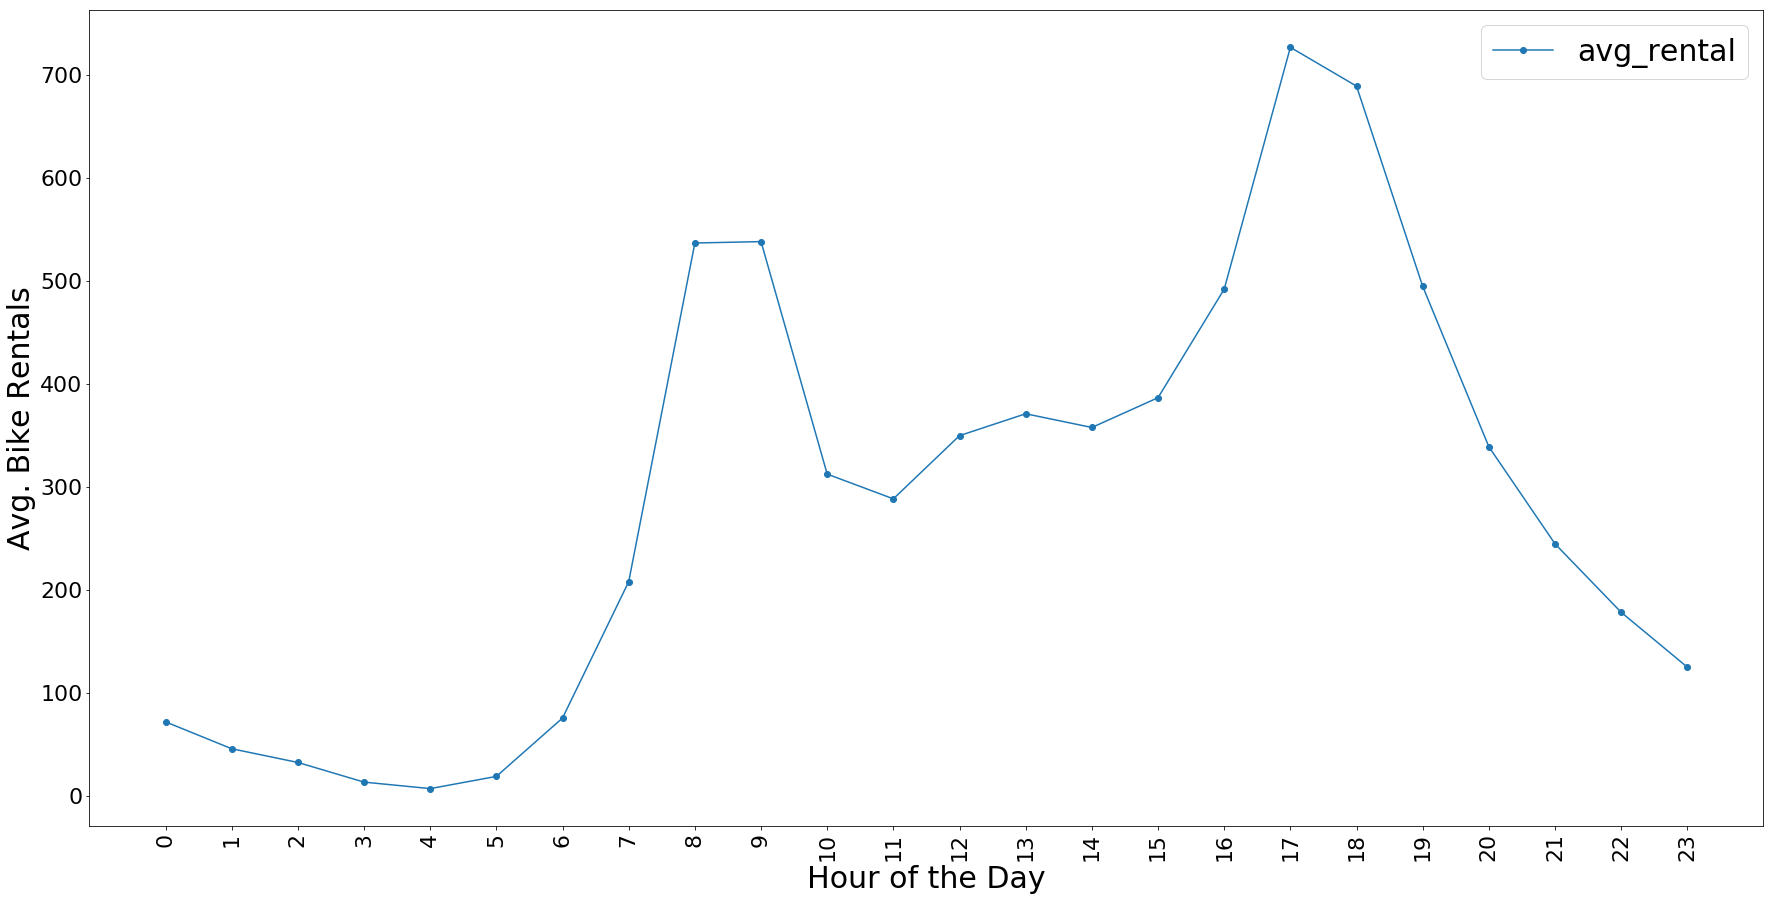

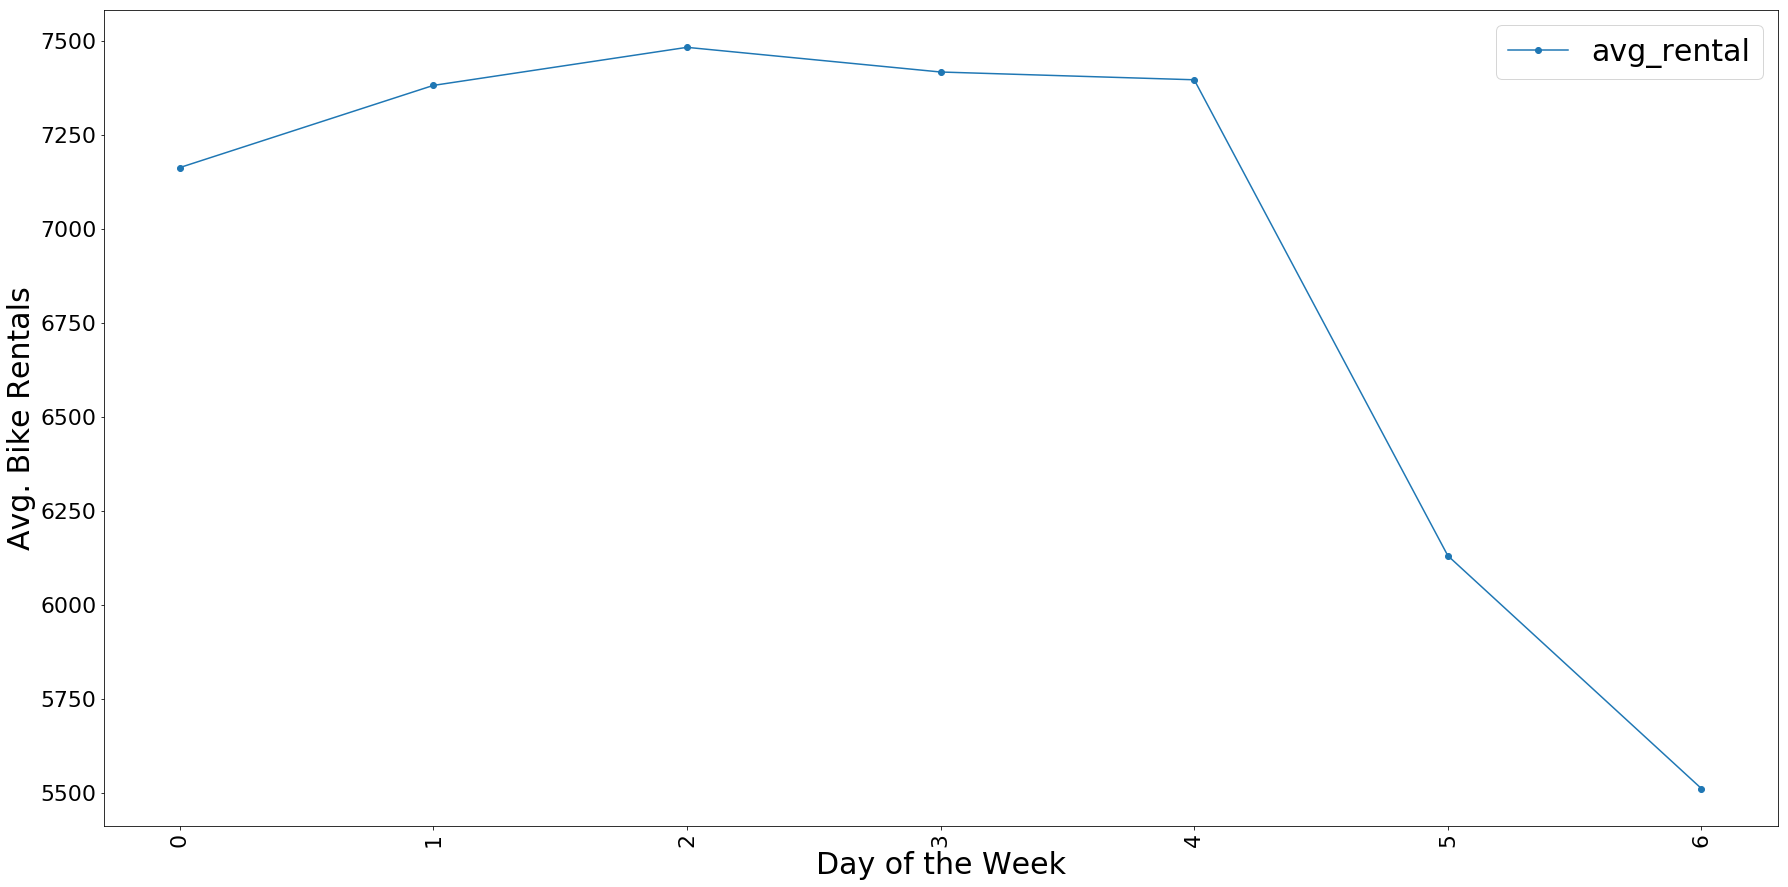

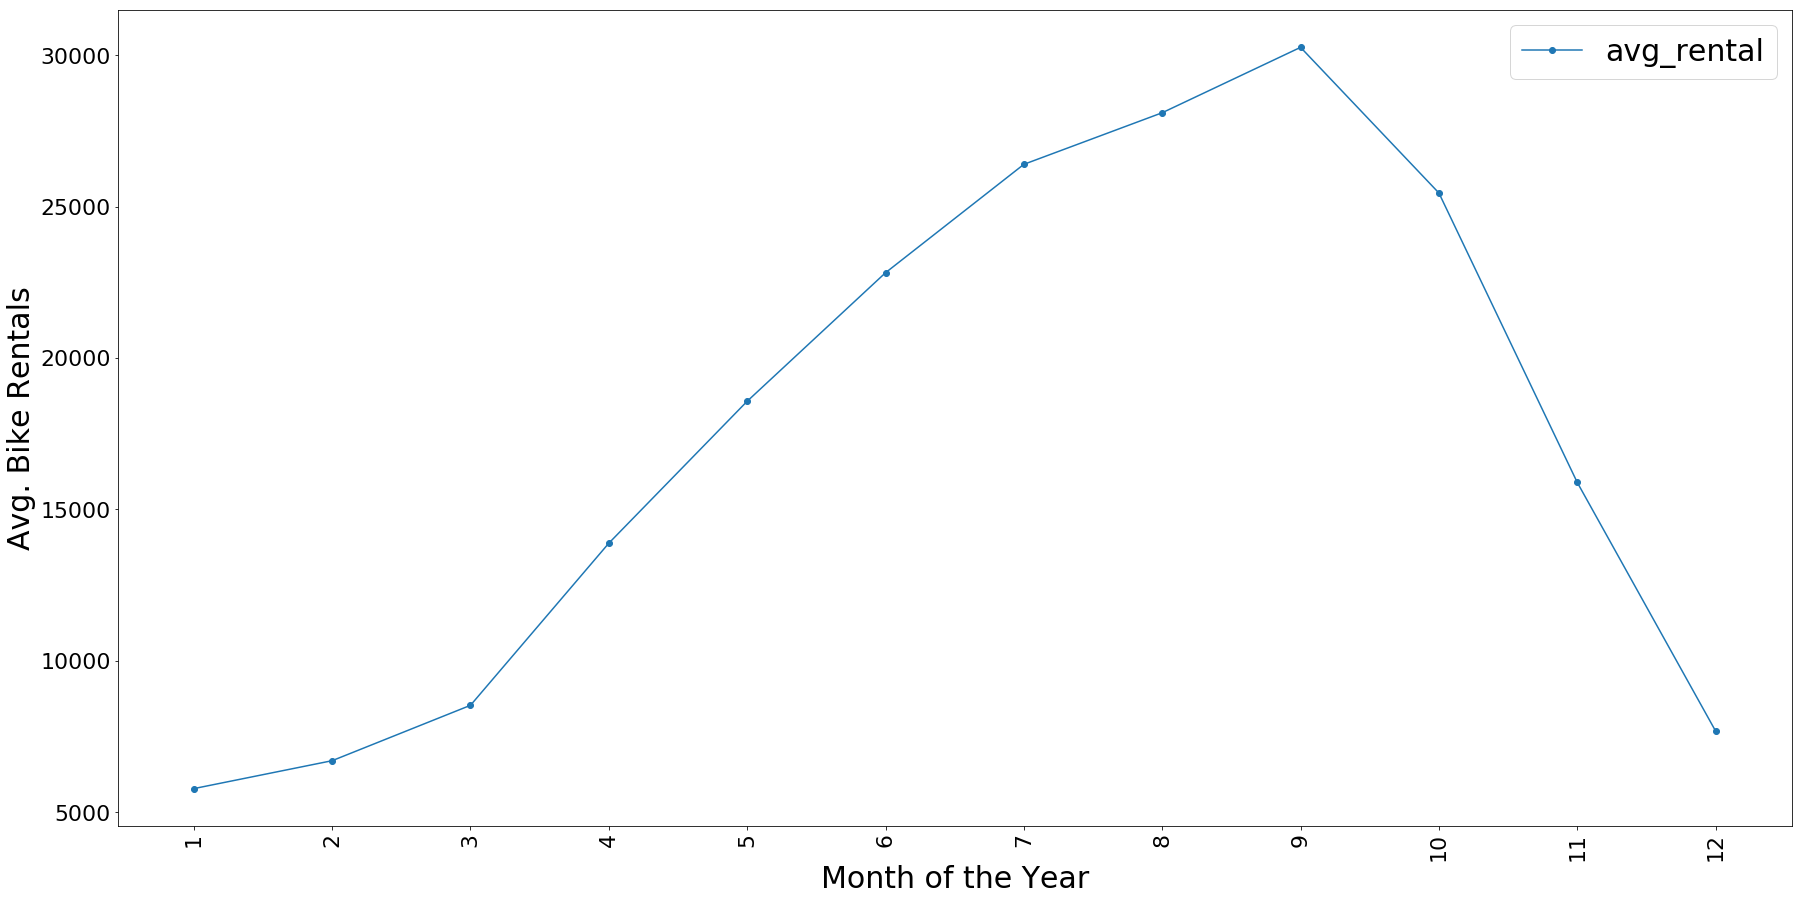

In [10]:
# Get total rentals per hour (all stations) and plot a timeseries
df_hourly_rentals = df[df['year'] == 2019].groupby(['hour'])['bikes_rental'].sum().to_frame().reset_index()
df_hourly_rentals['avg_rental'] = df_hourly_rentals['bikes_rental']/365

# Get total rentals per month (all stations) and plot a timeseries
df_month_rentals = df[df['year'] == 2019].groupby(['month'])['bikes_rental'].sum().to_frame().reset_index()
df_month_rentals['avg_rental'] = df_month_rentals['bikes_rental']/12

# Get total rentals per day of the week (all stations) and plot a timeseries
df_day_rentals = df[df['year'] == 2019].groupby(df['starttime'].dt.weekday)['bikes_rental'].sum().to_frame().reset_index()
df_day_rentals['avg_rental'] = df_day_rentals['bikes_rental']/52

display(HTML("<br><h3>Average bike rentals per hour for ALL stations (previous year: 2019)</h3><br>"))
utils.plot_line(df_hourly_rentals, 'hour', ['avg_rental'], 'Hour of the Day', 'Avg. Bike Rentals', font_size=22, fig_size=(30,15))

display(HTML("<br><br>"))

display(HTML("<br><h3>Average bike rentals per day of the week for ALL stations (previous year: 2019)</h3><br>"))
utils.plot_line(df_day_rentals, 'starttime', ['avg_rental'], 'Day of the Week', 'Avg. Bike Rentals', font_size=22, fig_size=(30,15))

display(HTML("<br><br>"))

display(HTML("<br><h3>Average bike rentals per month for ALL stations (previous year: 2019)</h3><br>"))
utils.plot_line(df_month_rentals, 'month', ['avg_rental'], 'Month of the Year', 'Avg. Bike Rentals', font_size=22, fig_size=(30,15))


<br><br>

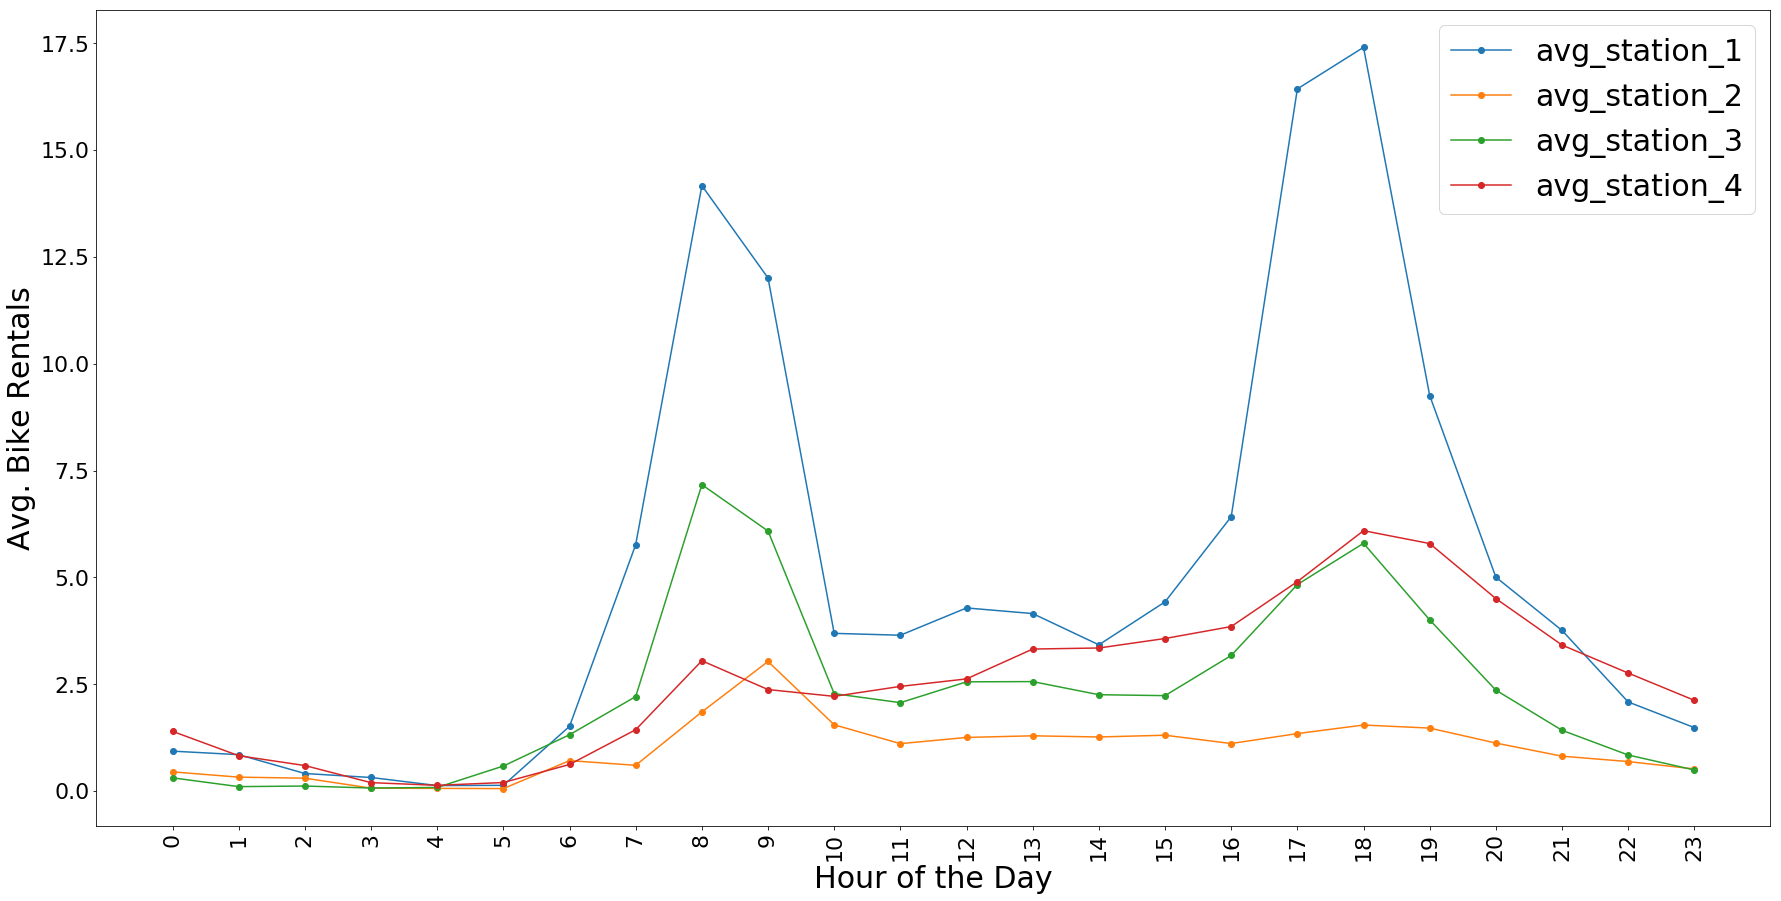

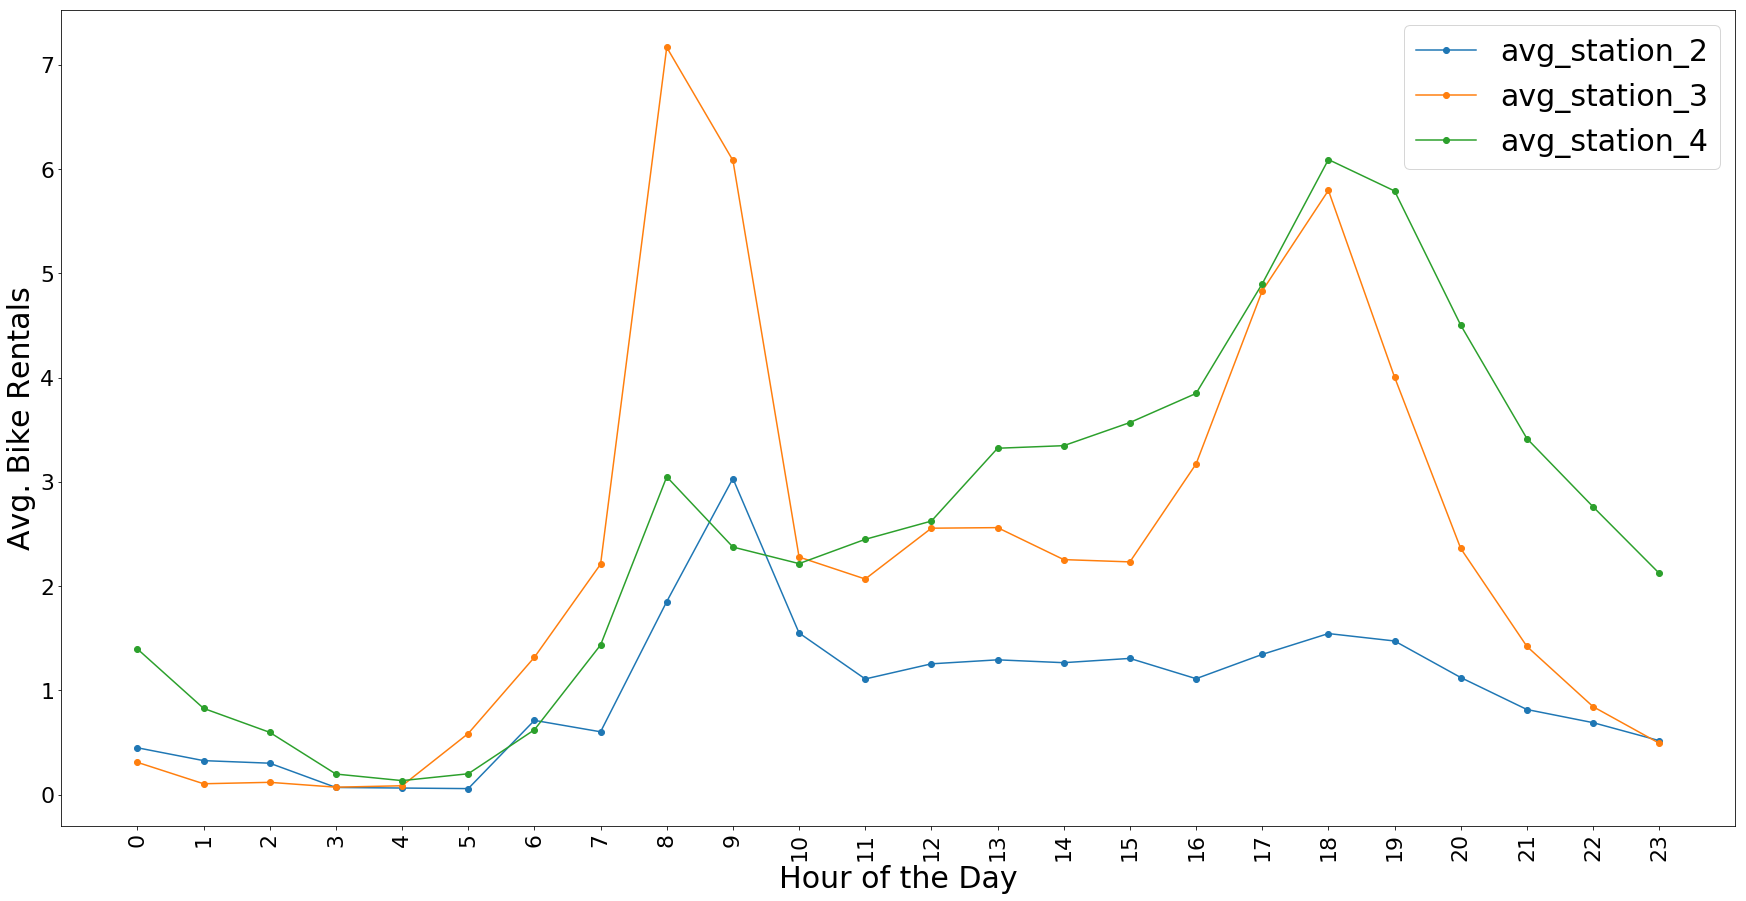

In [11]:
# Get total rentals per hour (all stations) and plot a timeseries
df_station_1 = df[((df['year'] == 2019) & (df['station_id'] == 22))].groupby(['hour'])['bikes_rental'].sum().to_frame().reset_index()
df_station_1['avg_rental'] = df_station_1['bikes_rental']/365

# Get total rentals per hour (all stations) and plot a timeseries
df_station_2 = df[((df['year'] == 2019) & (df['station_id'] == 39))].groupby(['hour'])['bikes_rental'].sum().to_frame().reset_index()
df_station_2['avg_rental'] = df_station_2['bikes_rental']/365

# Get total rentals per hour (all stations) and plot a timeseries
df_station_3 = df[((df['year'] == 2019) & (df['station_id'] == 8))].groupby(['hour'])['bikes_rental'].sum().to_frame().reset_index()
df_station_3['avg_rental'] = df_station_3['bikes_rental']/365

# Get total rentals per hour (all stations) and plot a timeseries
df_station_4 = df[((df['year'] == 2019) & (df['station_id'] == 53))].groupby(['hour'])['bikes_rental'].sum().to_frame().reset_index()
df_station_4['avg_rental'] = df_station_4['bikes_rental']/365

# Merge all 4 different stations into on single dataframe
df_stations_rental = df_station_1.merge(df_station_2, on='hour', how='left').merge(df_station_3, on='hour', how='left').merge(df_station_4, on='hour', how='left').fillna(0)
df_stations_rental = df_stations_rental[['hour','avg_rental_x','avg_rental_y']]
df_stations_rental.columns = ['hour','avg_station_1','avg_station_2','avg_station_3','avg_station_4']

display(HTML("<br><h3>Average bike rentals per hour for 4 stations (previous year: 2019)</h3><br>"))
utils.plot_line(df_stations_rental, 'hour', ['avg_station_1','avg_station_2','avg_station_3','avg_station_4'], 'Hour of the Day', 'Avg. Bike Rentals', font_size=22, fig_size=(30,15))

display(HTML("<br><br>"))

display(HTML("<br><h3>Average bike rentals per hour for 3 stations (previous year: 2019)</h3><br>"))
utils.plot_line(df_stations_rental, 'hour', ['avg_station_2','avg_station_3','avg_station_4'], 'Hour of the Day', 'Avg. Bike Rentals', font_size=22, fig_size=(30,15))

<br><br><br><br>

## Predictive Model <a class="anchor" id="predict"></a><br>

The next code section of this Jupyter Notebook will conduct a brief exercise to build a predictive model that will allow us to forecast the bike rentals for each station. 

The bike rental prediction will then be used as an input for the Linear Programming (LP) Optimization model to calculate the supply and demand.

<br><br>
<b>Random Forest Regression</b>

The predictive model selected was a Random Forest Regression, which is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the mean prediction of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

<img src="./media/random_forest.png"><br><br>

In [12]:
df_model = df.groupby(['station_id','starttime','year','month','day','hour','holiday','weekend'])['bikes_rental'].sum().to_frame().reset_index()
df_model = df_model[df_model['station_id'].isin(df_station_info['station_id'].unique().tolist())]

display(HTML("<br><h3>Train dataset *first 10 rows*</h3><br>"))
display(df_model.head(10))

,station_id,starttime,year,month,day,hour,holiday,weekend,bikes_rental
0,3,2017-01-01 14:00:00,2017,1,1,14,0,1,1
1,3,2017-01-01 19:00:00,2017,1,1,19,0,1,2
2,3,2017-01-02 21:00:00,2017,1,2,21,1,0,1
3,3,2017-01-03 17:00:00,2017,1,3,17,0,0,1
4,3,2017-01-03 22:00:00,2017,1,3,22,0,0,1
5,3,2017-01-04 10:00:00,2017,1,4,10,0,0,1
6,3,2017-01-04 12:00:00,2017,1,4,12,0,0,1
7,3,2017-01-04 16:00:00,2017,1,4,16,0,0,3
8,3,2017-01-04 17:00:00,2017,1,4,17,0,0,1
9,3,2017-01-04 20:00:00,2017,1,4,20,0,0,1


<br><br>

In [13]:
independent_var = ['station_id','month','day','hour','holiday','weekend']

dependent_var = 'bikes_rental'

X = df_model[independent_var]
y = df_model[dependent_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

mdl = RFR(max_features='auto',max_depth=10,bootstrap=True,min_samples_leaf=4,min_samples_split=5,n_estimators=10)
mdl.fit(X_train, y_train)
r2score, rmse = utils.eval_model(mdl, X_train, y_train, X_test, y_test)
    
print("Random Forest | R2 = %s - RMSE = %s"%(r2score,rmse))

Random Forest | R2 = 0.29 - RMSE = 7.07


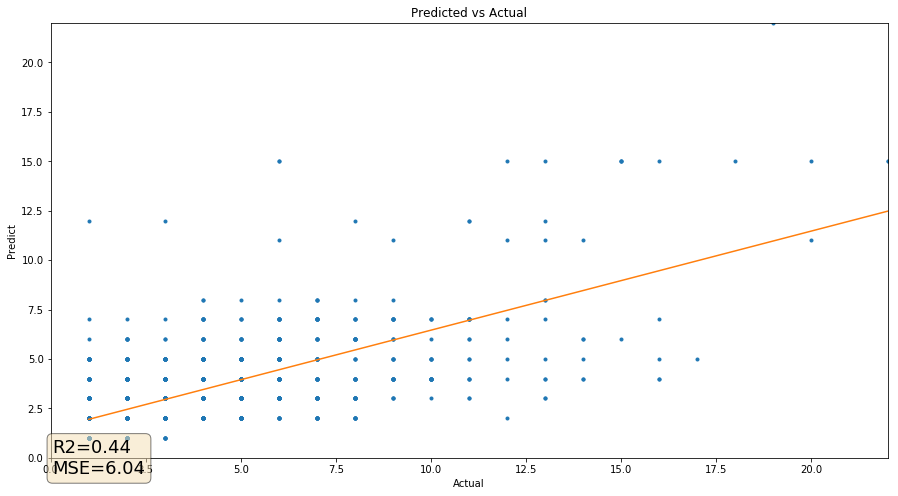

In [14]:
d_start = '2019-03-01 00:00:00'
d_end = '2019-03-10 00:00:00'

df_test = df_model[(df_model['station_id'].isin([67, 68, 80, 22, 189, 178, 190, 74, 107, 179])) & (df_model['starttime'] > d_start) & (df_model['starttime'] < d_end)]
df_test['bikes_rental_pred'] = mdl.predict(df_test[independent_var])

df_test['bikes_rental_pred'] = df_test['bikes_rental_pred'].round()

display(HTML("<br><h3>Test dataset Predicted vs Actual Bike Rentals</h3><br>"))
utils.plot_predicted_vs_actual(df_test, 'bikes_rental', 'bikes_rental_pred')

In [15]:
# Save predictive model as .pkl
joblib_file = os.path.join("models", "bike_prediction.pkl") 
joblib.dump(mdl, joblib_file)

['models\\bike_prediction.pkl']

<br><br>

## Linear Programming (LP) Model <a class="anchor" id="lp"></a><br>

The next code section of this Jupyter Notebook will build and solve the Linear Programming Optimization model described at initial section of this document. 

In summary, the intention is to use the transportation problem approach to fulfill the bike demand across the entire network, reducing the transportation cost required to meet the effort. 

Please refer to the [BlueBikes re-balancing approach](#approach) section for more details.

<br><br><img src="./media/transportation.png">

In [17]:
# Get the main URLs from BlueBikes
response = requests.get('https://gbfs.bluebikes.com/gbfs/gbfs.json')
df_feeds = pd.DataFrame(response.json()['data']['en']['feeds'])

# Send Get Request for Station Status
status_uri = df_feeds.loc[df_feeds['name'] == 'station_status']['url'].reset_index(drop=True)[0]
response = requests.get(status_uri)
df_station_status = pd.DataFrame(response.json()['data']['stations'])

# Send Get Request for Station Information
info_uri = df_feeds.loc[df_feeds['name'] == 'station_information']['url'].reset_index(drop=True)[0]
response = requests.get(info_uri)
df_station_info = pd.DataFrame(response.json()['data']['stations'])

# Select only the stations that are active
df_station_status = df_station_status[df_station_status['station_status'] == 'active']

# Select only the important columns and merge both dataframes
df_station_status = df_station_status[['station_id','num_bikes_available','num_docks_available']]
df_station_info = df_station_info[['station_id', 'short_name', 'name', 'lat', 'lon']]

df_stations = df_station_status.merge(df_station_info, on='station_id', how='left') 
df_stations = df_stations[['station_id','short_name','name','lat','lon','num_bikes_available','num_docks_available']]
df_stations['station_capacity_percent'] = df_stations['num_bikes_available'] / (df_stations['num_bikes_available'] + df_stations['num_docks_available'])
df_stations['station_capacity_percent'] = df_stations['station_capacity_percent'].round(3)

In [18]:
# Load predictive model from file
mdl_inference = joblib.load(joblib_file)

#Get current datetime
dt_now = datetime.datetime.now()

# Get the holiday calendar
cal = calendar()
holidays = cal.holidays(start='2020-01-01', end=dt_now)

# Check if today is holiday
is_holiday = int((dt_now.date() in holidays))

# Check if today is weekeend
is_weekend = int(dt_now.weekday() // 5 == 1)

# Build inference dataframe
df_inference = pd.DataFrame(df_stations['station_id']) 
df_inference['month'] = dt_now.month
df_inference['day'] = dt_now.day
df_inference['hour'] = dt_now.hour
df_inference['holiday'] = is_holiday
df_inference['weekend'] = is_weekend
df_inference['bike_rental_prediction'] = mdl_inference.predict(df_inference).astype(np.int)

# Merge the real time data with the predicted values
df_real_time = df_stations.merge(df_inference[['station_id','bike_rental_prediction']], on='station_id', how='left') 
df_real_time['bike_rental_prediction'] += 2

display(HTML("<br><h3>Real Time data from BlueBikes website plus predicted rentals</h3><br>"))
display(df_real_time.head(10))

,station_id,short_name,name,lat,lon,num_bikes_available,num_docks_available,station_capacity_percent,bike_rental_prediction
0,11,A32004,Longwood Ave at Binney St,42.338629,-71.106500,4,11,0.267,4
1,3,B32006,Colleges of the Fenway - Fenway at Avenue Louis Pasteur,42.340115,-71.100619,14,1,0.933,4
2,4,C32000,Tremont St at E Berkeley St,42.345392,-71.069616,17,2,0.895,4
3,5,B32012,Northeastern University - North Parking Lot,42.341814,-71.090179,8,7,0.533,4
4,6,D32000,Cambridge St at Joy St,42.361257,-71.065287,15,0,1.000,4
5,7,A32000,Fan Pier,42.353391,-71.044571,3,12,0.200,4
6,8,A32001,Union Square - Brighton Ave at Cambridge St,42.353334,-71.137313,7,11,0.389,4
7,9,A32002,Commonwealth Ave at Agganis Way,42.351692,-71.119035,11,4,0.733,4
8,10,A32003,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,11,0,1.000,4
9,12,B32002,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,-71.087986,14,4,0.778,4


<br><br>

In [19]:
# Calculate the real time supply and demand
df_real_time['num_bikes_diff'] = df_real_time['num_bikes_available'] - df_real_time['bike_rental_prediction']

df_real_time.loc[df_real_time['num_bikes_diff'] < 0, "real_demand"] =  df_real_time['bike_rental_prediction'] - df_real_time['num_bikes_available']
df_real_time.loc[df_real_time['num_bikes_diff'] > 0, "real_supply"] =   df_real_time['num_bikes_available'] - df_real_time['bike_rental_prediction']

df_real_time = df_real_time.fillna(0)

# Shift index by one (start at 1) and store it as a column
df_real_time.index += 1

# Get the distance matrix
df_real_time['rad_lat'] = df_real_time['lat'].apply(radians)
df_real_time['rad_lon'] = df_real_time['lon'].apply(radians)

station_distances = haversine_distances(df_real_time[['rad_lat','rad_lon']])
station_distances = station_distances * 6371000/1000  # multiply by Earth radius to get kilometers


if df_real_time['num_bikes_diff'].sum() >= 0:
    print('Feasible Solution, try to solve')

    # Build LP Model
    
    # Initialize LP Model
    opt_model = cpx.Model(name="MIP Model")
    
    n = len(df_real_time)
    m = len(df_real_time) + 1 # Length of stations plus 'dummy' column
    set_I = range(1, n+1)
    set_J = range(1, m+1)
    
    # Xij Lower/Upper Boundry -- aka Bikes
    l = {(i,j): 0 for i in set_I for j in set_J}
    u = {(i,j): 20 for i in set_I for j in set_J}
    
    # Supply
    a = df_real_time['real_supply'].astype('int32').to_dict()
    # Demand
    b = df_real_time['real_demand'].astype('int32').to_dict()
    
    # Add the dummy demand
    b[m] = df_real_time['num_bikes_diff'].sum().astype('int32')
    
    # Distance Matrix from Station 'A' to Station 'B'
    dummy_col = np.zeros((station_distances.shape[0],1))
    station_distances = np.hstack((station_distances,dummy_col))
    c = {(i,j): station_distances[i-1][j-1] for i in set_I for j in set_J}
    
    # X is Integer
    x_vars  = {(i,j): opt_model.integer_var(lb=l[i,j], ub= u[i,j], name="x_{0}_{1}".format(i,j)) for i in set_I for j in set_J}
    
    # Supply/Demand Constraints
    constraints_i = {i : opt_model.add_constraint(
    ct=opt_model.sum(x_vars[i,j] for j in set_J) == a[i], ctname="constraint_{0}".format(i)) for i in set_I}
    
    constraints_j = {j : opt_model.add_constraint(
    ct=opt_model.sum(x_vars[i,j] for i in set_I) == b[j], ctname="constraint_{0}".format(j)) for j in set_J}
    
    # Objective Function
    objective = opt_model.sum(x_vars[i,j] * c[i,j] for i in set_I for j in set_J)
    
    opt_model.minimize(objective)
    
    # Solve LP Model
    opt_model.solve()

else:
    print('Unfeasible Solution, cannot solve')

Feasible Solution, try to solve


<br><br>

## Solution <a class="anchor" id="solution"></a><br>

The next code section of this Jupyter Notebook will use the output solution from previous step and will display relevant information, along with a solution table that contains:

1. <b>From Station ID</b>: the origin station with supply
2. <b>To Station ID</b>: the destination station with demand
3. <b>Station A Capacity %</b>: the real-time capacity at origin station
4. <b>Station B Capacity %</b>: the real-time capacity at destination station
5. <b>Bikes to Move</b>: the recommended number of bikes to transport from origin station into destination station
6. <b>Distance to Travel (Km)</b>: the distnace from origin station to destination station
7. <b>Total distance to Travel (Km)</b>: the total distance effort, taking in count each bike unit required to be moved

In [21]:
df_real_time = df_real_time.reset_index()

# Read Solution
df_opt = pd.DataFrame.from_dict(x_vars, orient="index", columns = ["variable_object"])
df_opt.index = pd.MultiIndex.from_tuples(df_opt.index, names=["column_i", "column_j"])
df_opt.reset_index(inplace=True)

df_opt["solution_value"] = df_opt["variable_object"].apply(lambda item: item.solution_value)
df_opt.drop(columns=["variable_object"], inplace=True)

# Removing dummy results
df_opt = df_opt[df_opt['solution_value'] != 0]
df_opt = df_opt[df_opt['column_j'] != m]

df_opt = df_opt.reset_index(drop=True)
df_opt = df_opt.astype(np.int)

In [22]:
# Map all Column I to Station IDs and rename columns
df_opt = df_opt.merge(df_real_time[['index','short_name','lat','lon','station_capacity_percent']], left_on='column_i', right_on='index', how='left') 
df_opt = df_opt[['short_name','column_j','solution_value','lat','lon','station_capacity_percent']]
df_opt.columns = ['column_i','column_j','solution_value','lat_i','lon_i','station_capacity_percent_i']

# Map all Column J to Station IDs and rename columns
df_opt = df_opt.merge(df_real_time[['index','short_name','lat','lon','station_capacity_percent']], left_on='column_j', right_on='index', how='left') 
df_opt = df_opt[['column_i','short_name','solution_value','lat_i','lon_i','station_capacity_percent_i','lat','lon','station_capacity_percent']]
df_opt.columns = ['column_i','column_j','solution_value','lat_i','lon_i','station_capacity_percent_i','lat_j','lon_j','station_capacity_percent_j']

# Get the distance using Lat and Lon
df_opt['rad_lat_i'] = df_opt['lat_i'].apply(radians)
df_opt['rad_lon_i'] = df_opt['lon_i'].apply(radians)
df_opt['rad_lat_j'] = df_opt['lat_j'].apply(radians)
df_opt['rad_lon_j'] = df_opt['lon_j'].apply(radians)

# Calcualte the distance in kilometers
df_opt['distance_km'] = df_opt.apply(lambda row: utils.haversine(row), axis=1)
df_opt['total_distance_km'] = df_opt['distance_km'] * df_opt['solution_value']

# Select only important columns and rename them
df_opt = df_opt[['column_i','column_j','station_capacity_percent_i','station_capacity_percent_j','solution_value','distance_km','total_distance_km']]
df_opt.columns = ['From Station ID','To Station ID','Station A Capacity %','Station B Capacity %','Bikes to Move','Distance to Travel (Km)','Total distance to Travel (Km)']

In [23]:
pd.options.display.max_rows = 500

dist_km = df_opt['Total distance to Travel (Km)'].sum().round(2)
dist_miles = (df_opt['Total distance to Travel (Km)'].sum()*(0.621371)).round(2)

display(HTML("<br><br>"))
display(HTML("<h3>Relevant Information</h3>"))
display(HTML("<ul>"))
display(HTML("<li>The experiment was run on: <b>%s</b></li>"%(dt_now.strftime("%c"))))
display(HTML("<li>This LP model is intended to run every ~hour to accurately predict and anticipate demand"))
display(HTML("<li>There were a total of <b>%s</b> stations that needed bikes to fulfill demand</li>"%(len(df_opt))))
display(HTML("<li>There is an oportunity to relocate <b>%s</b> total bikes across stations that need demand</li>"%(df_opt['Bikes to Move'].sum())))
display(HTML("<li>The required travel distance to relocate all possible bikes to fulfill demand is <b>%s</b> kilometers (<b>%s</b> miles)</li>"%(dist_km,dist_miles)))
display(HTML("<li>Further ideas: Make the system sustainable, encouraging subscribers/users to help with the rebalance effort by offering incentives for each km (mile) they travel.</li>"))

display(HTML("</ul>"))
display(HTML("<br><br>"))
display(df_opt)

,From Station ID,To Station ID,Station A Capacity %,Station B Capacity %,Bikes to Move,Distance to Travel (Km),Total distance to Travel (Km)
0,A32001,D32034,0.389,0.200,1,0.594830,0.594830
1,A32002,K32006,0.733,0.200,1,0.183758,0.183758
2,B32003,B32036,1.000,0.000,1,0.410357,0.410357
3,A32008,D32032,0.467,0.105,1,0.462228,0.462228
4,A32010,D32015,0.239,0.053,3,0.326854,0.980562
5,A32010,A32042,0.239,0.074,2,0.119701,0.239403
6,B32007,B32014,0.333,0.111,2,0.369975,0.739951
7,C32001,B32055,0.455,0.000,4,0.454324,1.817296
8,C32001,B32059,0.455,0.158,1,0.308143,0.308143
9,B32013,B32036,0.571,0.000,3,0.084694,0.254082


<br><br><br><br><br><br>

## Conclusion <a class="anchor" id="conclusion"></a><br>

> The problem considered in this Jupyter notebook is a type of transportation problem in which the supply is not meeting the demands, due to which there is an opportunity area to reduce loss of revenue.
>
> The model is used to rebalance the system by fulfilling the demand of bikes for a station by supplying them from a station that has idle bikes. For transporting the bikes, there will always be some distance covered which will result in an unavoidable cost. To address this, a linear programming model is introduced which considers the minimum possible distance required to travel between the supply and the demand points.
>
> The goal is to have a sustainable system that rebalances itself by re-routing the idle resources to stations which have a demand for bikes. This in turn will generate revenue for the company with minimum possible costs incurred.
>
>The best method to implement our model would be to have the solution accessible in real-time to bike users and encourage them to help with the rebalance effort by offering incentives for each km (mile) they travel when returning a rented bike in a suggested station, based on the model rebalance recommendations. In favor of doing so, the user receives credit or points. This ensures the expected demands is meet at any station by minimum investment credits. The credits would be returned to rental company itself when the user next uses the service.

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>